## Install Packages

In [124]:
import importlib
import subprocess
import sys
import warnings

# Function to check and import packages
def install_and_import(package, alias=None):
    try:
        #If an alias is provided => use that as the variable name else package name will be used
        globals()[alias if alias else package] = importlib.import_module(package)
    except ImportError:
        print(f"🔹 Installing missing package: {package} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package]) #python -m pip install package_name
        globals()[alias if alias else package] = importlib.import_module(package)

# Required packages with their common aliases
required_packages = {
    "pandas": "pd",
    "numpy": "np", 
    "matplotlib": "plt",
    "seaborn": "sns",
    "sklearn": None, 
    "sweetviz": "sv",
    "os": None,
}

# Install and import packages
for package, alias in required_packages.items():
    install_and_import(package, alias)

# Suppress warnings
warnings.filterwarnings("ignore")

# ✅ Check if everything is loaded
print("\n✅ All required packages are installed and imported successfully!")

import matplotlib.pyplot as plt

!pip install xgboost

from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


✅ All required packages are installed and imported successfully!
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/149.9 MB 1.9 MB/s eta 0:01:21
   ---------------------------------------- 0.8/149.9 MB 1.5 MB/s eta 0:01:43
   ---------------------------------------- 1.0/149.9 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 1.3/149.9 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 1.6/149.9 MB 1.4 MB/s eta 0:01:47
   ---------------------------------------- 1.6/149.9 MB 1.4 MB/s eta 0:01:47
    --------------------------------------- 2.1/149.9 MB 1.3 MB/s eta 0:01:54
    --------------------------------------- 2.9/149.9 MB 1.6 MB/s eta 0:01:34
    --------------------------------------- 3.4/149.9 MB 1.7 MB/s eta 0:01:28
   - --------------

------

## Import & View the Dataset

In [85]:
df=pd.read_csv('./flight_data.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


-----
## Analyse the dataset through descriptive results & Remove unnecessary columns

In [87]:
df=df.drop('Unnamed: 0',axis=1)
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [59]:
df.shape

(300153, 11)

In [60]:
print(df.select_dtypes('int').corr())

           days_left     price
days_left   1.000000 -0.091949
price      -0.091949  1.000000


### Visualization

In [62]:
# 1. Popular Flight

df1=df.groupby(['flight','airline'], as_index=False).count()
airline_counts=df1.airline.value_counts()
airline_counts

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

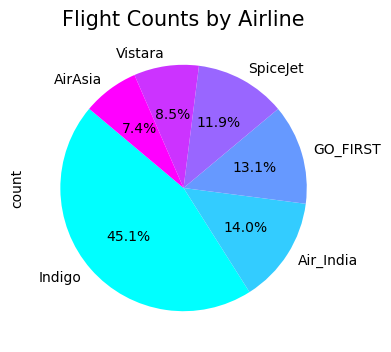

In [63]:
# Create a pie chart
plt.figure(figsize=(4, 4))
df1.airline.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140 , cmap='cool')

# Title and displaying the pie chart
plt.title('Flight Counts by Airline', fontsize=15)
plt.show()

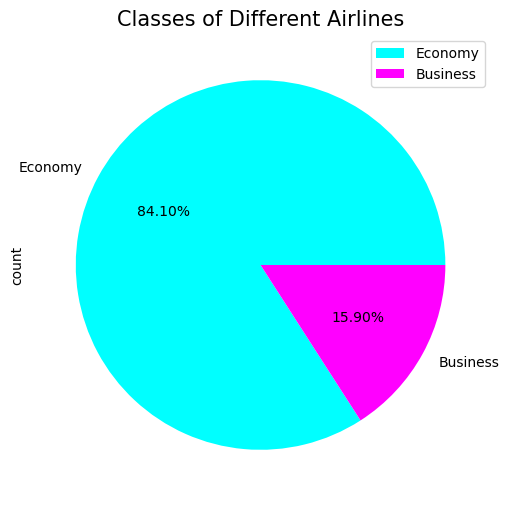

In [64]:
# 2. Which Class bought more tickets?

df2=df.groupby(['flight','airline','class'],as_index=False).count()
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

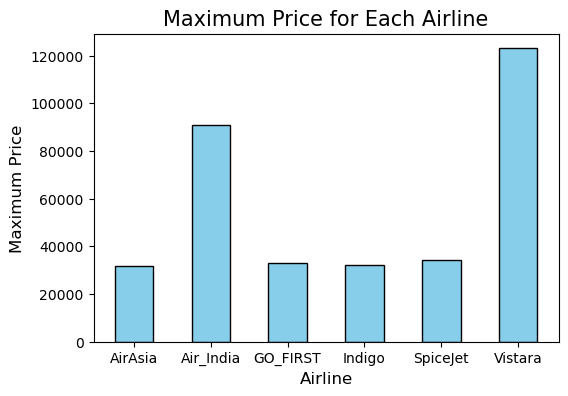

In [65]:
# 3. Comparision of Prices

df1 = df.groupby(['airline'], as_index=False).agg({'price': 'max'})
plt.figure(figsize=(6, 4))
plt.bar(df1['airline'], df1['price'], color='skyblue', edgecolor='black' ,width=0.5)
plt.title('Maximum Price for Each Airline', fontsize=15)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Maximum Price', fontsize=12)
plt.show()

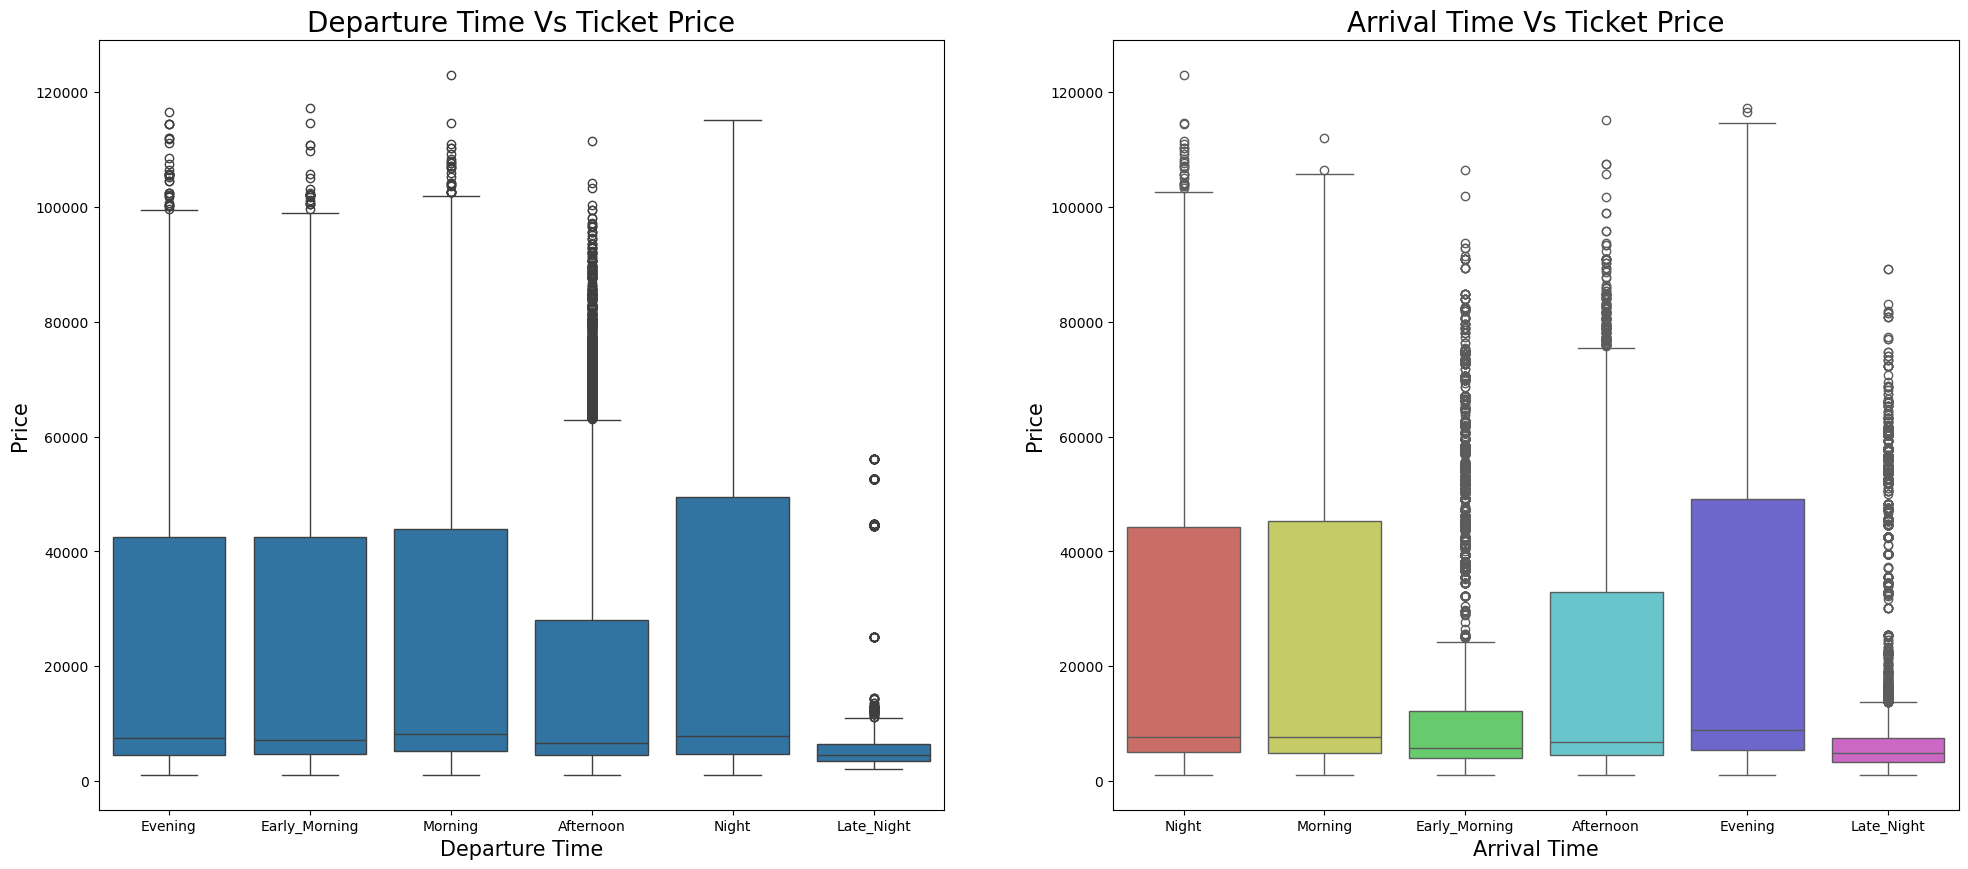

In [66]:
# 4. Affect of Departure & Arrival Time on Price

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Key Insights

1. **Airline Dominance**
   Indigo dominates the domestic airline market, accounting for **45.1%** of total flights. Other key players include Air India (14%), GO\_FIRST (13.1%), and SpiceJet (11.9%). AirAsia and Vistara follow with smaller market shares.

2. **Class Distribution**
   The majority of tickets sold belong to the **Economy class (84.1%)**, while **Business class** flights make up only **15.9%**. This indicates a price-sensitive consumer base preferring economical travel options.

3. **Price Variation by Airline**
   * **Vistara** and **Air India** show significantly higher maximum ticket prices, suggesting a focus on premium services or long-haul sectors.
   * Budget carriers like Indigo, GO\_FIRST, and AirAsia maintain moderate maximum prices, supporting their low-cost positioning.


4. **Departure & Arrival Time Impact on Prices**
   * Flights departing in the **Night and Evening** hours generally have higher ticket prices.
   * Similarly, flights arriving in the **Evening and Night** slots tend to cost more.
   * **Late-night and early-morning** flights are relatively cheaper, possibly reflecting lower demand.

-----------------

### Recommendations for Airlines

1. **Indigo & Other Budget Airlines**

   * **Leverage dominance** by expanding routes or adding frequency in high-demand sectors.
   * **Maintain competitive pricing** while improving punctuality and basic amenities to retain market share.
   * **Upsell premium services (e.g., meals, priority boarding)** to generate additional revenue without alienating cost-sensitive customers.

2. **Vistara & Air India**

   * Highlight the **value of premium services** (comfort, meals, flexible rescheduling) to justify higher prices.
   * Consider **introducing mid-tier fare classes** (e.g., premium economy) to capture a broader segment.
   * Focus marketing on **business travelers and long-haul segments** where price elasticity is lower.

3. **All Airlines**

   * **Dynamic pricing optimization** based on time-of-day demand trends (e.g., charge more for night/evening flights).
   * Encourage off-peak bookings with **discounts or bundled offers** during late-night/early-morning slots.

---

### Recommendations for Passengers

1. **Economy Travelers**

   * Book with budget airlines like **Indigo, GO\_FIRST**, or **AirAsia** to get the best value for money.
   * Choose **early-morning or late-night flights** for the lowest fares if flexible.

2. **Business or Premium Passengers**

   * **Air India and Vistara** are ideal for comfort, flexibility, and premium services—especially on longer or important trips.
   * Consider **off-peak departure times** even on premium airlines to save on ticket prices.

3. **All Travelers**

   * Monitor **price fluctuations based on timing** and use fare trackers or aggregators to find optimal booking windows.


----

## Prepare Data to Train Model

### Step 1: Apply LabelEncoder to convert the non numerical columns to numeric 

In [91]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder

# create an instance
le=LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,2289
1,4,1387,2,1,2,4,5,1,2.33,1,2289
2,0,1213,2,1,2,1,5,1,2.17,1,2292
3,5,1559,2,4,2,0,5,1,2.25,1,2291
4,5,1549,2,4,2,4,5,1,2.33,1,2291
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,11203
300149,5,1481,1,0,0,5,3,0,10.42,49,11544
300150,5,1486,1,1,0,5,3,0,13.83,49,11617
300151,5,1483,1,1,0,2,3,0,10.00,49,11705


### Step 2: Use Scaling Technique to bring the values of the column on same scale

In [102]:
from sklearn.preprocessing import MinMaxScaler

#create an instance of MinMaxScaler with the feature range set between 0 and 1
mmscaler=MinMaxScaler(feature_range=(0,1))

#Applying Scaling to the data & convert it to DataFrame
df_norm=pd.DataFrame(mmscaler.fit_transform(df))

df_norm.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0.8,0.902564,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0,0.188302
1,0.8,0.889103,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0,0.188302
2,0.0,0.777564,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0,0.188549


### Step 3: Split the data into Training & Testing

In [142]:
x=df_norm.drop([10],axis=1)
y=df_norm[10]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [144]:
y_test.head(3)

27131     0.283564
266857    0.907618
141228    0.204919
Name: 10, dtype: float64

### Step 4: Use Stochastic Gradient Descent (SGD), XGBoost, & ExtraTreesRegressor Algorithm To Train & test

In [146]:
# SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)

# XGBoost Regressor
xgb_model = XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(x_train, y_train)
y_pred_et = et_model.predict(x_test)

print("Successfully Done.")

Successfully Done.


In [147]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE  : {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}")
    print("----------------------------------------")


In [148]:
evaluate_model(y_test, y_pred_sgd, "SGD Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")
evaluate_model(y_test, y_pred_et, "Extra Trees Regressor")



SGD Regressor Evaluation Metrics:
MAE  : 0.10
MSE  : 0.02
RMSE : 0.12
R²   : 0.8653
----------------------------------------

XGBoost Regressor Evaluation Metrics:
MAE  : 0.04
MSE  : 0.00
RMSE : 0.07
R²   : 0.9589
----------------------------------------

Extra Trees Regressor Evaluation Metrics:
MAE  : 0.02
MSE  : 0.00
RMSE : 0.05
R²   : 0.9813
----------------------------------------


### Insights

- Extra Trees Regressor outperforms the others across all metrics with lowest error values (MAE, MSE, RMSE) & highest R² score (98.13%), indicating excellent predictive power and fit to the data.
- XGBoost also performs strongly, with very competitive error metrics and good generalization. It could be a solid choice if you aim to balance performance with model complexity and interpretability.
- SGD Regressor, being a linear model, performs relatively worse. While efficient and scalable, it may not capture complex, nonlinear patterns in pricing behavior as effectively as tree-based models.